In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('csv/gameandgrade.csv')

In [3]:
# Define Features (X) and Target (Y)
x = df[["Mother Education", "Father Education"]]  # All columns except target
y = df["Grade"]  # Target variable

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
print("Training Set:")
print(x_train)
print(y_train)

print("\nTesting Set:")
print(x_test)
print(y_test)

Training Set:
     Mother Education  Father Education
60                  6                 6
623                 5                 5
615                 3                 5
687                 3                 4
760                 2                 2
..                ...               ...
71                  1                 2
106                 5                 5
270                 4                 3
435                 5                 6
102                 3                 4

[616 rows x 2 columns]
60     95.00
623      100
615      100
687    80.00
760    57.00
       ...  
71     70.00
106    72.50
270    70.00
435      100
102    70.00
Name: Grade, Length: 616, dtype: object

Testing Set:
     Mother Education  Father Education
670                 5                 5
753                 4                 4
727                 4                 4
582                 3                 3
737                 3                 5
..                ...               ...
356  

In [7]:
print(f"Intercept (b): {model.intercept_:.2f}")  # The base score when all features are 0
coefficients = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coefficients)

Intercept (b): 57.19
                  Coefficient
Mother Education     3.525922
Father Education     2.264666


In [28]:
y_pred = model.predict(x_test)

# Ensure y_test is numeric
y_test = pd.to_numeric(y_test, errors="coerce")

# Find valid indices where both y_test and y_pred are not NaN
valid_indices = ~y_test.isna() & ~np.isnan(y_pred)  

# Apply filtering
y_test_clean = y_test[valid_indices]
y_pred_clean = y_pred[valid_indices]

print("NaN values after final cleaning:")
print("y_test_clean:", y_test_clean.isna().sum())
print("y_pred_clean:", np.isnan(y_pred_clean).sum())

NaN values after final cleaning:
y_test_clean: 0
y_pred_clean: 0


In [29]:
# Compute errors using the cleaned data
mse = mean_squared_error(y_test_clean, y_pred_clean)
r2 = r2_score(y_test_clean, y_pred_clean)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 253.58
R² Score: 0.18


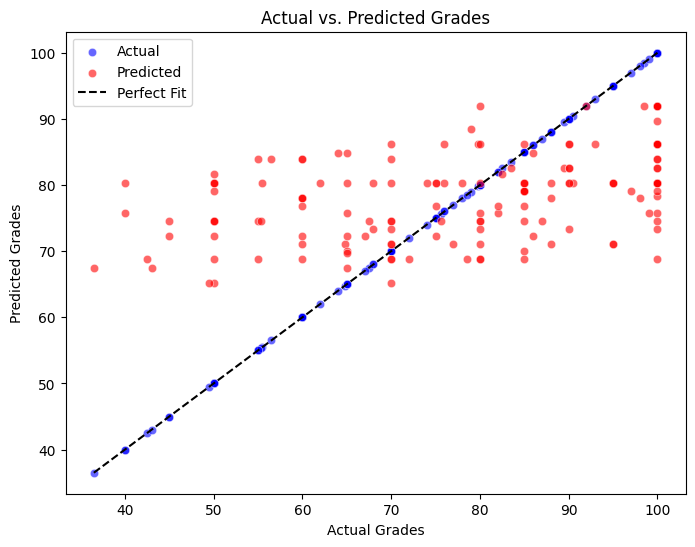

In [30]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_clean.values.flatten(), y=y_test_clean.values.flatten(), color="blue", label="Actual", alpha=0.6)  # Actual values
sns.scatterplot(x=y_test_clean.values.flatten(), y=y_pred_clean.flatten(), color="red", label="Predicted", alpha=0.6)  # Predicted values

# Plot a reference diagonal line (perfect predictions)
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], color="black", linestyle="--", label="Perfect Fit")

# Labels, title, and legend
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs. Predicted Grades")
plt.legend()
plt.show()

In [31]:
coefficients = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients)


                  Coefficient
Mother Education     3.525922
Father Education     2.264666


In [32]:
r2_train = r2_score(y_train, model.predict(x_train))
r2_test = r2_score(y_test_clean, y_pred_clean)

print(f"R² Score on Training Data: {r2_train:.4f}")
print(f"R² Score on Test Data: {r2_test:.4f}")


R² Score on Training Data: 0.1349
R² Score on Test Data: 0.1790
